   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

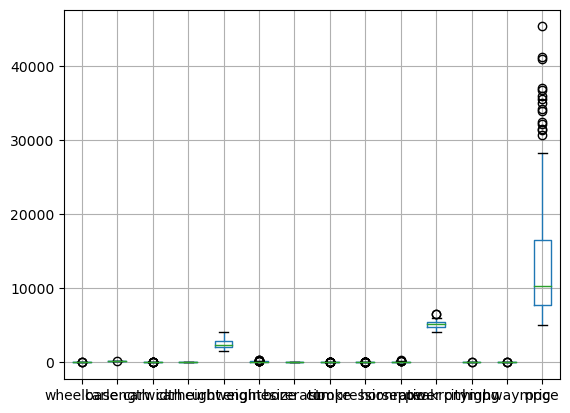

(161, 26)
car_ID              161
symboling             6
CarName             115
fueltype              1
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        1
wheelbase            41
carlength            62
carwidth             35
carheight            44
curbweight          136
enginetype            6
cylindernumber        5
enginesize           31
fuelsystem            6
boreratio            28
stroke               28
compressionratio     21
horsepower           41
peakrpm              14
citympg              21
highwaympg           24
price               148
dtype: int64
(161, 152)
           car_ID   symboling     wheelbase     carlength      carwidth  \
count  161.000000  161.000000  1.610000e+02  1.610000e+02  1.610000e+02   
mean   103.248447    0.844720  9.488614e-16  1.191593e-15  7.943956e-15   
std     61.176388    1.201868  1.000000e+00  1.000000e+00  1.000000e+00   
min      1.000000   -2.000000 -2.320139e+0

ValueError: shapes (129,153) and (152,1) not aligned: 153 (dim 1) != 152 (dim 0)

In [54]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the dataset
df = pd.read_csv("CarPrices.csv")

# Print the first five rows of the dataset
print(df.head())

# Print the summary statistics of the dataset
print(df.describe())

# Print the information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# There are no missing values in the dataset

# Check for outliers

df.boxplot(column=["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"])
plt.show()

# Define a function to remove outliers
def remove_outliers(df, column):
    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Return the modified dataframe
    return df

# Apply the function to the variables with outliers
df = remove_outliers(df, "compressionratio")
df = remove_outliers(df, "horsepower")
df = remove_outliers(df, "peakrpm")
df = remove_outliers(df, "price")

# Check the shape of the dataframe after removing outliers
print(df.shape)

# Check for categorical variables
print(df.nunique())

# using get_dummies() method from pandas to perform dummy encoding

# Define a list of categorical variables
cat_vars = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

# Perform dummy encoding
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Check the shape of the dataframe after dummy encoding
print(df.shape)


# Define a function to perform feature scaling (standardization)
def standardize(df, columns):
    for column in columns:
        mean, std = calculate_mean_std(df[column])
        df[column] = (df[column] - mean) / std
    return df

# Define a list of numerical variables
num_vars = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]

# Perform feature scaling (standardization)
df = standardize(df, num_vars)

# Check the summary statistics of the dataframe after feature scaling
print(df.describe())

# Split the data into training and testing sets

# Define the input and output variables
X = df.drop("price", axis=1)  # Input variables (features)
y = df["price"]  # Output variable (target)

# Split the data into training and testing sets
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)
    test_indices = np.random.choice(num_samples, num_test_samples, replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)
    
    X_train = X.iloc[train_indices]
    y_train = y.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

# Define the hypothesis function
def hypothesis(X, w):
    # Add the intercept term to X
    X = np.c_[np.ones((X.shape[0], 1)), X]

    # Calculate the hypothesis function
    h = np.dot(X, w)

    # Return the hypothesis function
    return h

# Define the cost function
def cost_function(X, y, w):
    m = len(y)
    h = hypothesis(X, w)
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return J


# Set the number of iterations
iterations = 1000


# Define the gradient descent algorithm
def gradient_descent(X, y, w, alpha, iterations):
    # Initialize a list to store the cost function values
    J_history = []

    # Add the intercept term to X
    ones = np.ones((X.shape[0], 1))
    X = np.concatenate((ones, X), axis=1)

    m = len(y)

    for _ in range(iterations):
        h = hypothesis(X, w)
        error = h - y
        gradient = (1 / m) * np.dot(X.T, error)
        w = w - alpha * gradient
        J = cost_function(X, y, w)
        J_history.append(J)

    return w, J_history

# data preprocessing
X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']]
y = df['price']


# Initialize the coefficients and the learning rate
w = np.zeros((X_train.shape[1] + 1, 1))
alpha = 0.01
iterations = 1000

# Run the gradient descent algorithm
w, J_history = gradient_descent(X_train, y_train, w, alpha, iterations)

# Print the final coefficients
print("Final Coefficients:", w)

# Plot the loss vs epoch graph
plt.plot(range(iterations), J_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch Graph")
plt.show()

# Evaluate the model performance on the testing set

# Define the RMSE function
def rmse(y_true, y_pred):
    # Calculate the RMSE
    rmse = math.sqrt((1 / y_true.shape[0]) * np.sum(np.square(y_true - y_pred)))
    # Return the RMSE
    return rmse

# Define the R^2 function
def r2_score(y_true, y_pred):
    # Calculate the mean of the actual values
    y_mean = np.mean(y_true)
    # Calculate the total sum of squares
    ss_tot = np.sum(np.square(y_true - y_mean))
    # Calculate the residual sum of squares
    ss_res = np.sum(np.square(y_true - y_pred))
    # Calculate the R^2 score
    r2 = 1 - (ss_res / ss_tot)
    # Return the R^2 score
    return r2

# Predict the output values for the testing set
y_pred = hypothesis(X_test, w)

# Calculate the RMSE and R^2 score for the testing set
rmse_test = rmse(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print the RMSE and R^2 score for the testing set
print("RMSE: ", rmse_test)
print("R^2: ", r2_test)

# Plot the regression line
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


In [29]:
# Define a list of categorical variables
cat_vars = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

# Perform dummy encoding
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Check the shape of the dataframe after dummy encoding
print(df.shape)


KeyError: "None of [Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',\n       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',\n       'fuelsystem'],\n      dtype='object')] are in the [columns]"

In [37]:
print(df.nunique())

car_ID             161
symboling            6
wheelbase           41
carlength           62
carwidth            35
                  ... 
fuelsystem_2bbl      2
fuelsystem_4bbl      2
fuelsystem_mpfi      2
fuelsystem_spdi      2
fuelsystem_spfi      2
Length: 152, dtype: int64


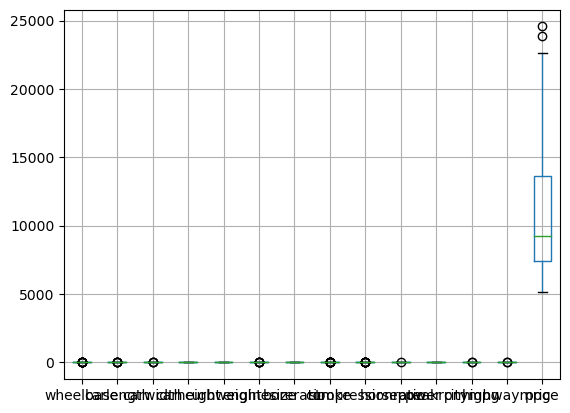

In [20]:
df.boxplot(column=["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"])
plt.show()

In [ ]:

# Define the gradient descent function
def gradient_descent(X, y, w, alpha, iterations):
    # Initialize a list to store the cost at each iteration
    J_history = []

    # Loop over the number of iterations
    for i in range(iterations):
        # Calculate the hypothesis function
        h = hypothesis(X, w)

        # Calculate the error
        error = h - y

        # Calculate the gradient
        gradient = (1 / len(y)) * X.T.dot(error)

        # Update the coefficients
        w = w - alpha * gradient

        # Calculate the cost
        J = cost_function(X, y, w)
        J_history.append(J)

    # Return the final coefficients and the cost history
    return w, J_history

# Initialize the coefficient vector w
w = np.zeros(X_train.shape[1])

# Set the learning rate and number of iterations
alpha = 0.01  # Set the learning rate to 0.01
iterations = 1000

# Run the gradient descent algorithm
w, J_history = gradient_descent(X_train, y_train, w, alpha, iterations)

# Print the final coefficients
print("Final Coefficients: ", w)


#Plot the loss vs epoch graph
plt.plot(range(iterations), J_history) 
plt.xlabel("Epoch") 
plt.ylabel("Loss") 
plt.title("Loss vs Epoch Graph") 
plt.show()


Final Coefficients: [[ 0.53272745]
 [-0.01663405]]


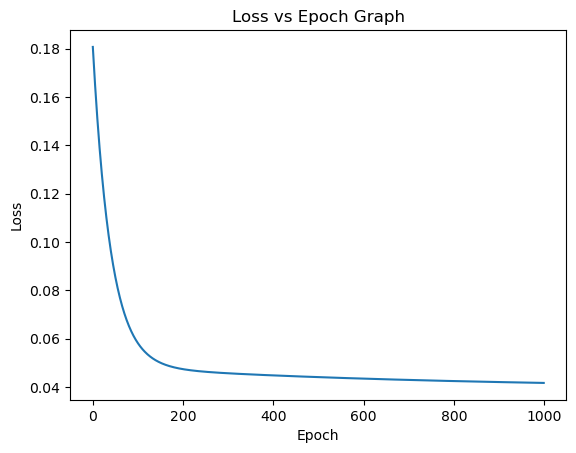

ValueError: shapes (32,159) and (2,1) not aligned: 159 (dim 1) != 2 (dim 0)

In [49]:


# Define the hypothesis function
def hypothesis(X, w):
    return np.dot(X, w)

# Define the cost function
def cost_function(X, y, w):
    m = len(y)
    h = hypothesis(X, w)
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return J

# Define the gradient descent algorithm
def gradient_descent(X, y, w, alpha, iterations):
    # Initialize a list to store the cost function values
    J_history = []

    # Add the intercept term to X
    ones = np.ones((X.shape[0], 1))
    X = np.concatenate((ones, X), axis=1)

    m = len(y)

    for _ in range(iterations):
        h = hypothesis(X, w)
        error = h - y
        gradient = (1 / m) * np.dot(X.T, error)
        w = w - alpha * gradient
        J = cost_function(X, y, w)
        J_history.append(J)

    return w, J_history

# Example data preprocessing
X = df[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']]
y = df['price']


# Initialize the coefficients and the learning rate
w = np.zeros((X_train.shape[1] + 1, 1))
alpha = 0.01
iterations = 1000

# Run the gradient descent algorithm
w, J_history = gradient_descent(X_train, y_train, w, alpha, iterations)

# Print the final coefficients
print("Final Coefficients:", w)

# Plot the loss vs epoch graph
plt.plot(range(iterations), J_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch Graph")
plt.show()



In [53]:

# Define the RMSE function
def rmse(y_true, y_pred):
    rmse = math.sqrt((1 / len(y_true)) * np.sum((y_true - y_pred) ** 2))
    return rmse

# Define the R^2 function
def r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Predict the output values for the testing set
ones = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((ones, X_test), axis=1)
y_pred = hypothesis(X_test, w)

# Calculate the RMSE and R^2 score for the testing set
rmse_test = rmse(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print the RMSE and R^2 score for the testing set
print("RMSE:", rmse_test)
print("R^2:", r2_test)

# Plot the regression line
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (32, 32) instead